# 📊 DATA 200 – Applied Statistical Analysis
## Week 3 Deliverable: Exploratory Data Analysis (EDA)
### Project: A Statistical and Predictive Modeling Approach to Bank Term Deposit Subscription
**Team Fintech** | Saugat Ojha · Rakesh Kumar Sah · Naitik Shrestha

---
## 📦 1. Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='whitegrid', font_scale=1.05)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = (12, 5)

YES_COLOR = '#2E86AB'
NO_COLOR  = '#E84855'
PALETTE   = {'yes': YES_COLOR, 'no': NO_COLOR}

print('✅ Libraries loaded successfully')

✅ Libraries loaded successfully


---
## 📂 2. Load Dataset

In [5]:
df = pd.read_csv(r'C:\Users\admin\Desktop\project-team-x\bank.csv')
print(f'Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns')
df.head()

Dataset shape: 11,162 rows × 17 columns


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


---
## 🔍 3. Initial Data Inspection

In [6]:
print('─── Column Data Types ───')
print(df.dtypes)
print(f'\n─── Dataset Info ───')
df.info()

─── Column Data Types ───
age          int64
job            str
marital        str
education      str
default        str
balance      int64
housing        str
loan           str
contact        str
day          int64
month          str
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome       str
deposit        str
dtype: object

─── Dataset Info ───
<class 'pandas.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  str  
 2   marital    11162 non-null  str  
 3   education  11162 non-null  str  
 4   default    11162 non-null  str  
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  str  
 7   loan       11162 non-null  str  
 8   contact    11162 non-null  str  
 9   day        11162 non-null  int64
 10  month      11162 non-null  str  
 11  duration   11162 n

In [7]:
print('─── Missing Values ───')
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else '✅ No missing values found')

print(f'\n─── Duplicate Rows ───')
dupes = df.duplicated().sum()
print(f'✅ No duplicates found' if dupes == 0 else f'⚠️ {dupes} duplicate rows found')

─── Missing Values ───
✅ No missing values found

─── Duplicate Rows ───
✅ No duplicates found


In [8]:
print('─── Unique Values per Categorical Column ───')
for col in df.select_dtypes(include='object').columns:
    print(f'  {col:12s}: {df[col].nunique()} unique → {df[col].unique().tolist()}')

─── Unique Values per Categorical Column ───
  job         : 12 unique → ['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']
  marital     : 3 unique → ['married', 'single', 'divorced']
  education   : 4 unique → ['secondary', 'tertiary', 'primary', 'unknown']
  default     : 2 unique → ['no', 'yes']
  housing     : 2 unique → ['yes', 'no']
  loan        : 2 unique → ['no', 'yes']
  contact     : 3 unique → ['unknown', 'cellular', 'telephone']
  month       : 12 unique → ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep']
  poutcome    : 4 unique → ['unknown', 'other', 'failure', 'success']
  deposit     : 2 unique → ['yes', 'no']


---
## 📈 4. Descriptive Statistics

In [9]:
print('─── Numerical Features: Descriptive Statistics ───')
df.describe().round(2)

─── Numerical Features: Descriptive Statistics ───


,age,balance,day,duration,campaign,pdays,previous
count,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00
mean,41.23,1528.54,15.66,371.99,2.51,51.33,0.83
std,11.91,3225.41,8.42,347.13,2.72,108.76,2.29
min,18.00,-6847.00,1.00,2.00,1.00,-1.00,0.00
25%,32.00,122.00,8.00,138.00,1.00,-1.00,0.00
50%,39.00,550.00,15.00,255.00,2.00,-1.00,0.00
75%,49.00,1708.00,22.00,496.00,3.00,20.75,1.00
max,95.00,81204.00,31.00,3881.00,63.00,854.00,58.00


In [10]:
print('─── Categorical Features: Value Counts ───')
for col in df.select_dtypes(include='object').columns:
    print(f'\n{col.upper()}:')
    print(df[col].value_counts().to_frame())

─── Categorical Features: Value Counts ───

JOB:
               count
job                 
management      2566
blue-collar     1944
technician      1823
admin.          1334
services         923
retired          778
self-employed    405
student          360
unemployed       357
entrepreneur     328
housemaid        274
unknown           70

MARITAL:
          count
marital        
married    6351
single     3518
divorced   1293

EDUCATION:
           count
education       
secondary   5476
tertiary    3689
primary     1500
unknown      497

DEFAULT:
         count
default       
no       10994
yes        168

HOUSING:
         count
housing       
no        5881
yes       5281

LOAN:
      count
loan       
no     9702
yes    1460

CONTACT:
           count
contact         
cellular    8042
unknown     2346
telephone    774

MONTH:
       count
month       
may     2824
aug     1519
jul     1514
jun     1222
nov      943
apr      923
feb      776
oct      392
jan      344
sep      319

---
## 🎯 5. Target Variable Distribution

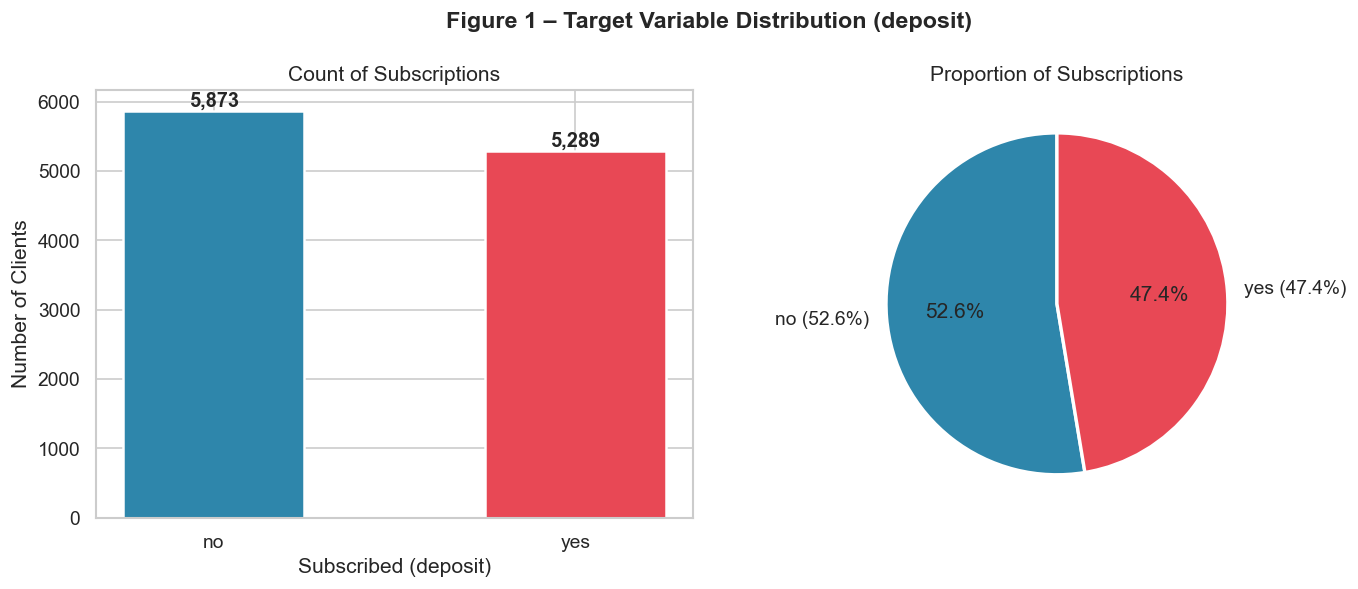


📊 Subscription rate: 47.4% Yes | 52.6% No


In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Figure 1 – Target Variable Distribution (deposit)', fontsize=14, fontweight='bold')

counts = df['deposit'].value_counts()
pct    = df['deposit'].value_counts(normalize=True) * 100

bars = axes[0].bar(counts.index, counts.values,
                   color=[YES_COLOR, NO_COLOR], edgecolor='white', linewidth=1.5, width=0.5)
for bar, val in zip(bars, counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, val + 60,
                 f'{val:,}', ha='center', fontweight='bold', fontsize=12)
axes[0].set_title('Count of Subscriptions')
axes[0].set_ylabel('Number of Clients')
axes[0].set_xlabel('Subscribed (deposit)')

labels = [f'{k} ({v:.1f}%)' for k, v in pct.items()]
axes[1].pie(counts.values, labels=labels, colors=[YES_COLOR, NO_COLOR],
            autopct='%1.1f%%', startangle=90,
            wedgeprops={'edgecolor': 'white', 'linewidth': 2})
axes[1].set_title('Proportion of Subscriptions')

plt.tight_layout()
plt.show()
print(f'\n📊 Subscription rate: {pct["yes"]:.1f}% Yes | {pct["no"]:.1f}% No')

> **Insight:** The dataset is nearly balanced (~47% subscribed vs ~53% not), which is favorable for logistic regression modeling without requiring heavy resampling techniques.

---
## 📊 6. Univariate Analysis – Numerical Features

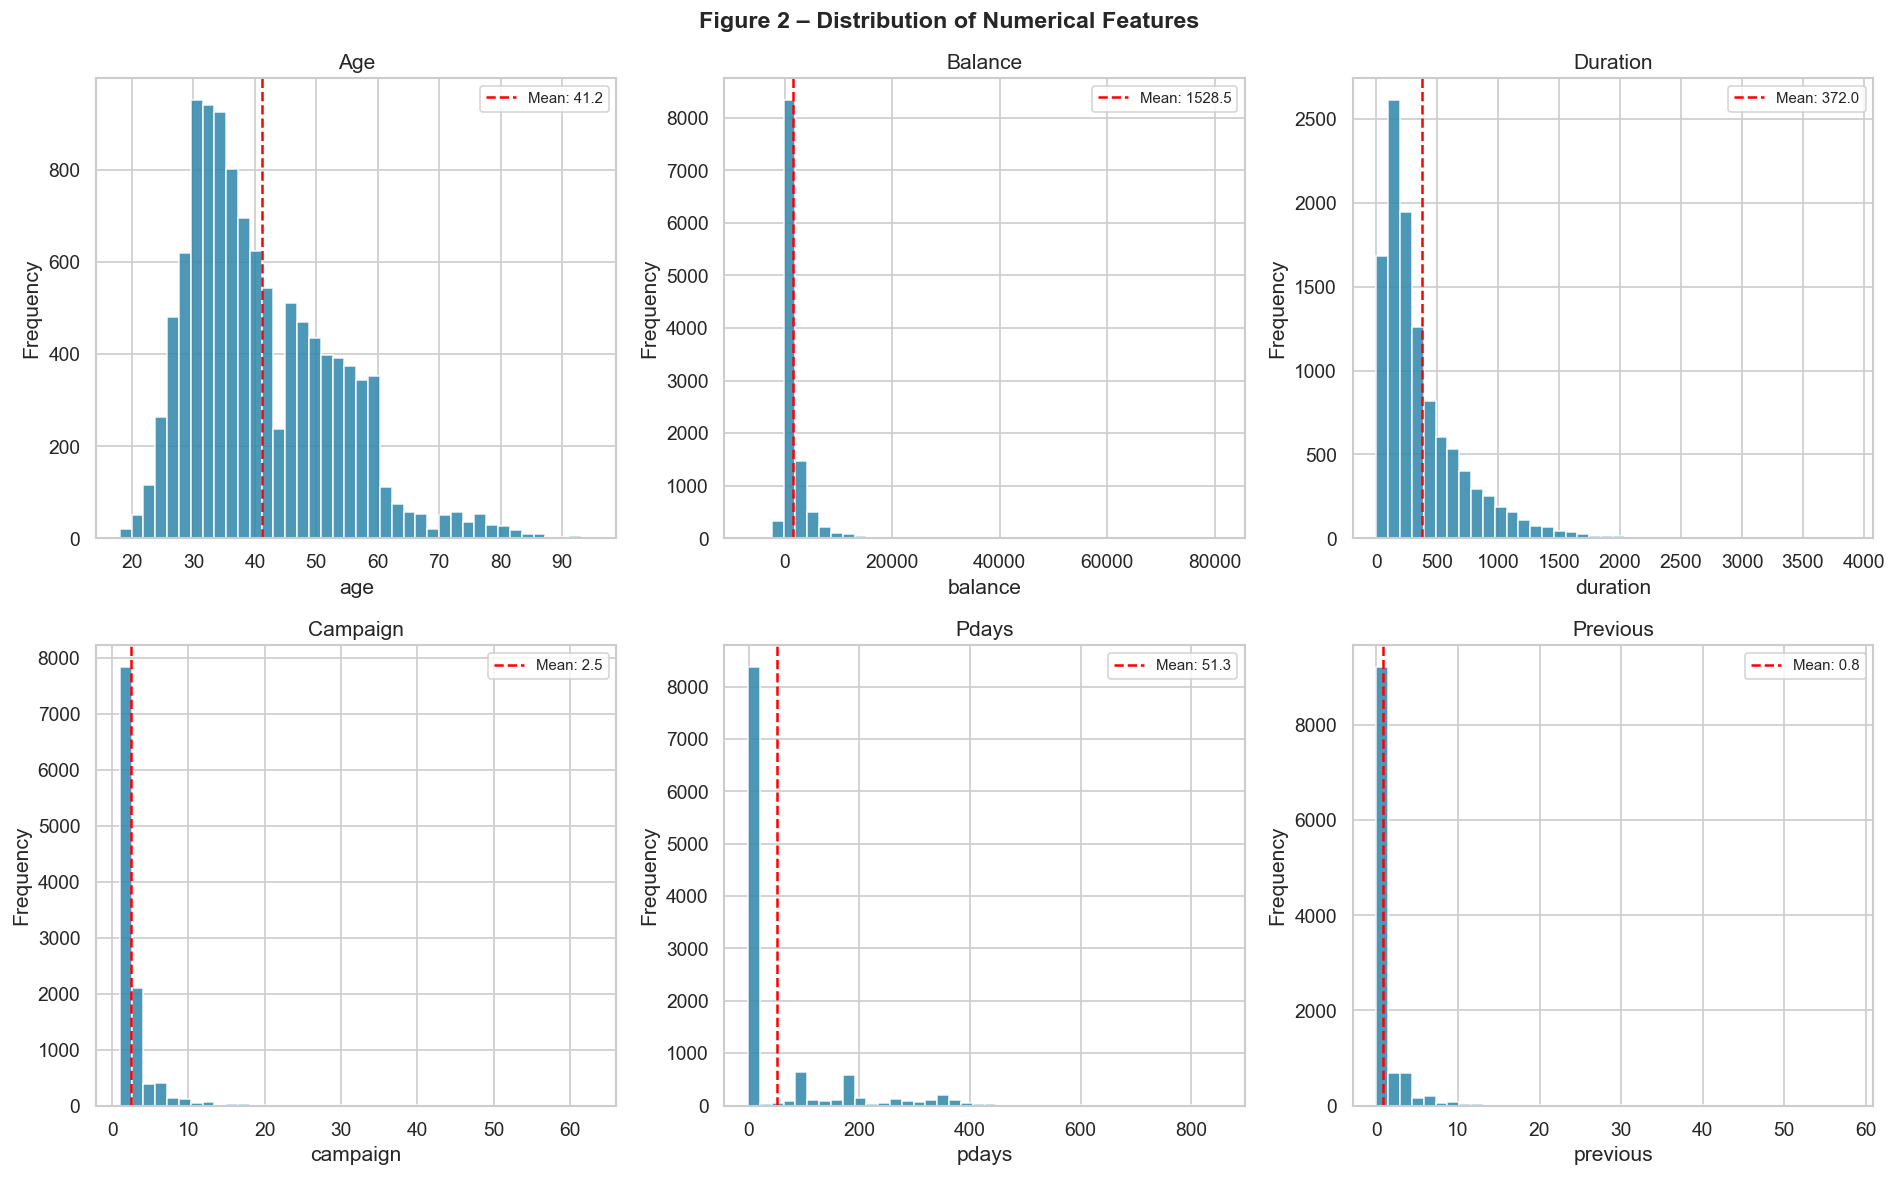

In [12]:
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Figure 2 – Distribution of Numerical Features', fontsize=14, fontweight='bold')

for ax, col in zip(axes.flatten(), num_cols):
    ax.hist(df[col], bins=40, color=YES_COLOR, edgecolor='white', alpha=0.85)
    ax.set_title(col.capitalize())
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    mean_val = df[col].mean()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.1f}')
    ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

> **Insight:** `duration` and `balance` are heavily right-skewed with notable outliers. `age` follows a roughly normal distribution centered around 40. `campaign` is concentrated at low values (1–3 calls), while `pdays` and `previous` are sparse, indicating most clients had no prior contact.

---
## 📊 7. Univariate Analysis – Categorical Features

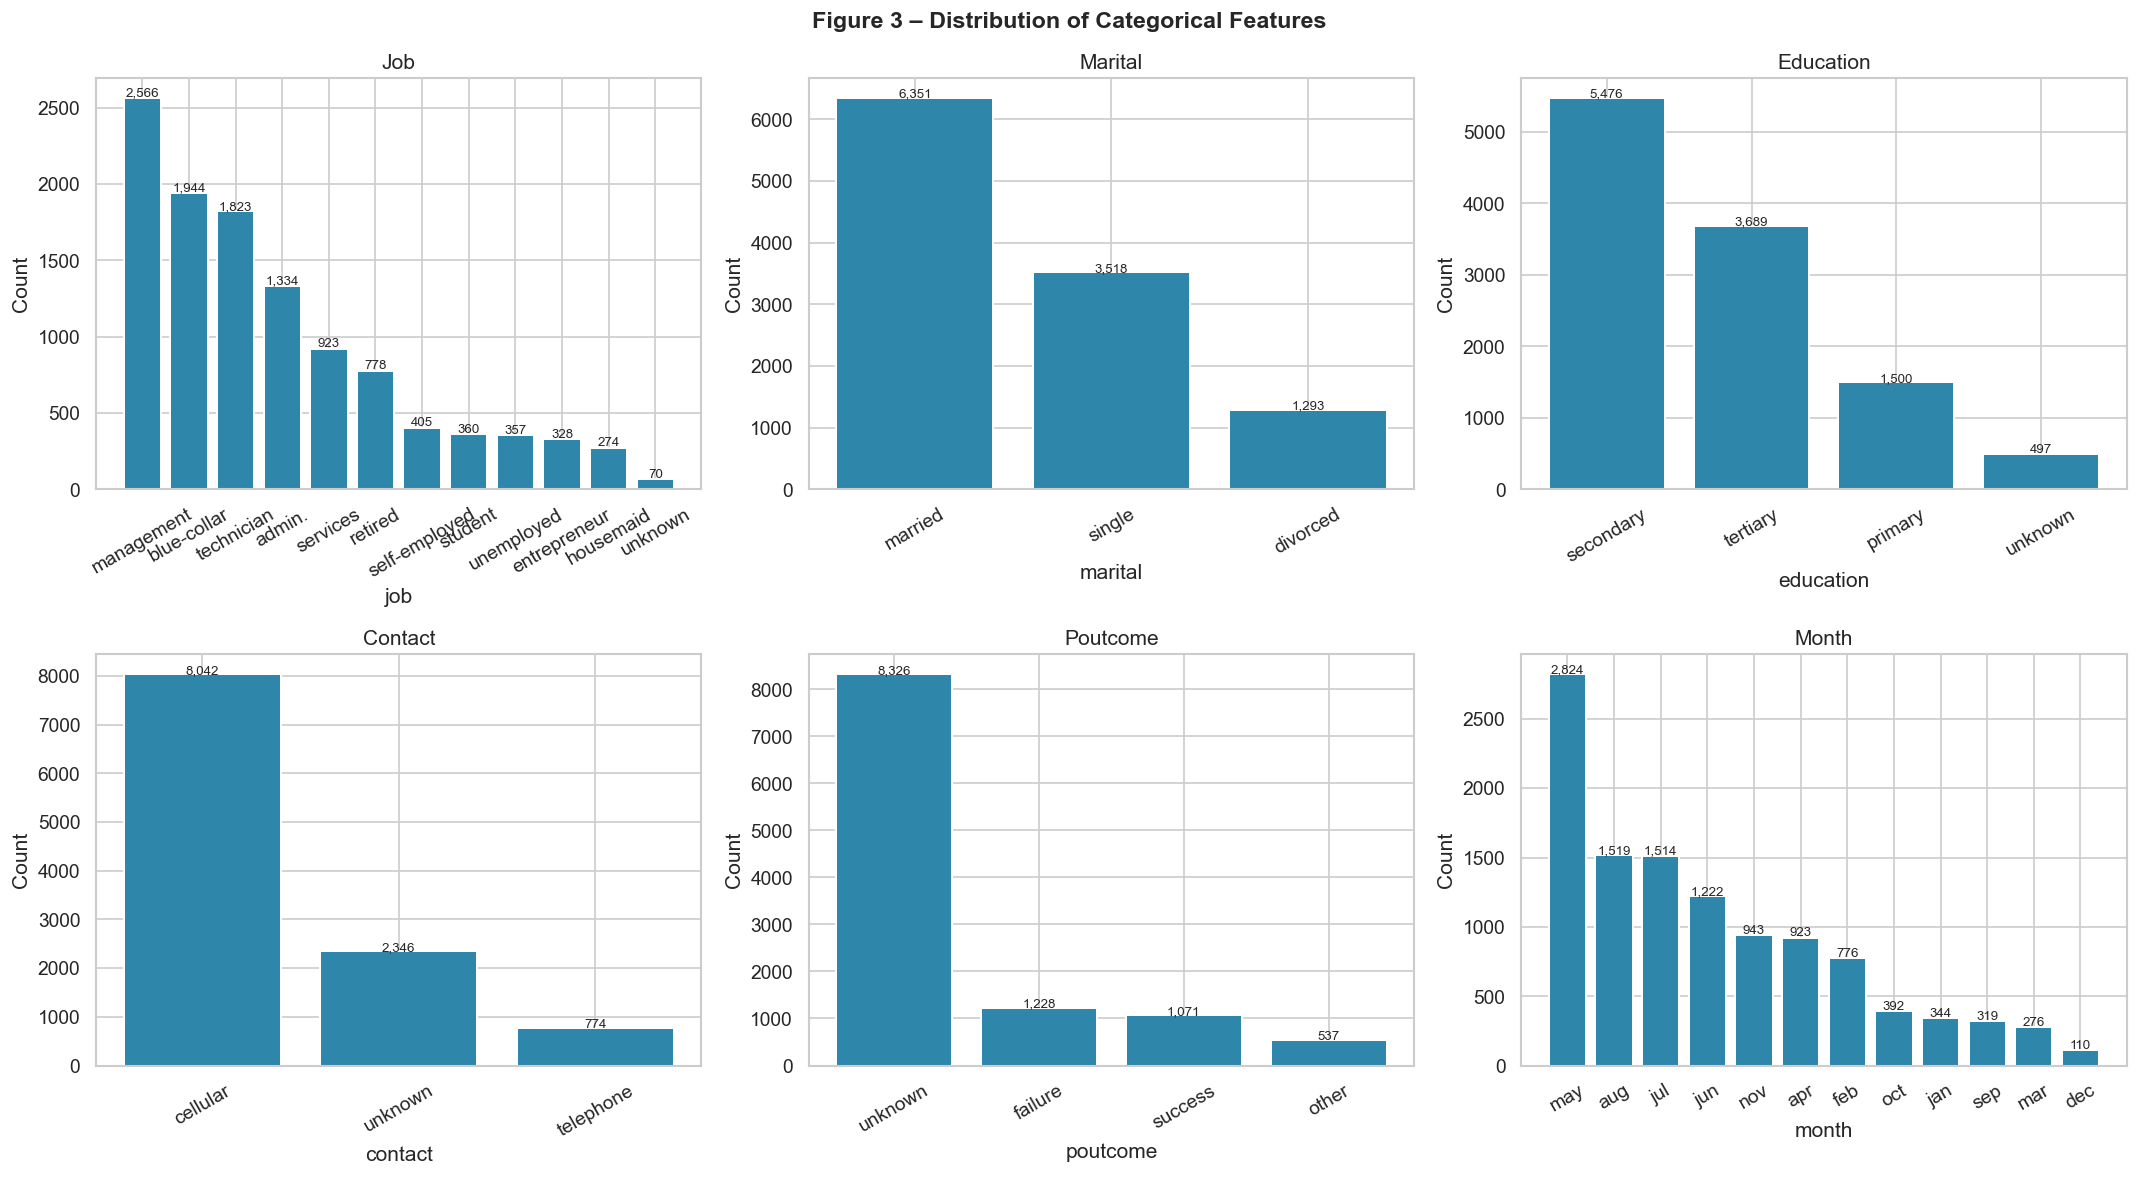

In [13]:
cat_cols = ['job', 'marital', 'education', 'contact', 'poutcome', 'month']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Figure 3 – Distribution of Categorical Features', fontsize=14, fontweight='bold')

for ax, col in zip(axes.flatten(), cat_cols):
    val_counts = df[col].value_counts()
    bars = ax.bar(val_counts.index, val_counts.values,
                  color=YES_COLOR, edgecolor='white', linewidth=1.2)
    ax.set_title(col.capitalize())
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=30)
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                f'{int(bar.get_height()):,}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

> **Insight:** `management`, `blue-collar`, and `technician` are the most common job categories. Most clients are `married` and hold `secondary` education. May is the most active campaign month. Contact type is dominated by `cellular`, and most clients have no prior outcome recorded (`unknown`).

---
## 🔗 8. Bivariate Analysis – Numerical Features vs Target

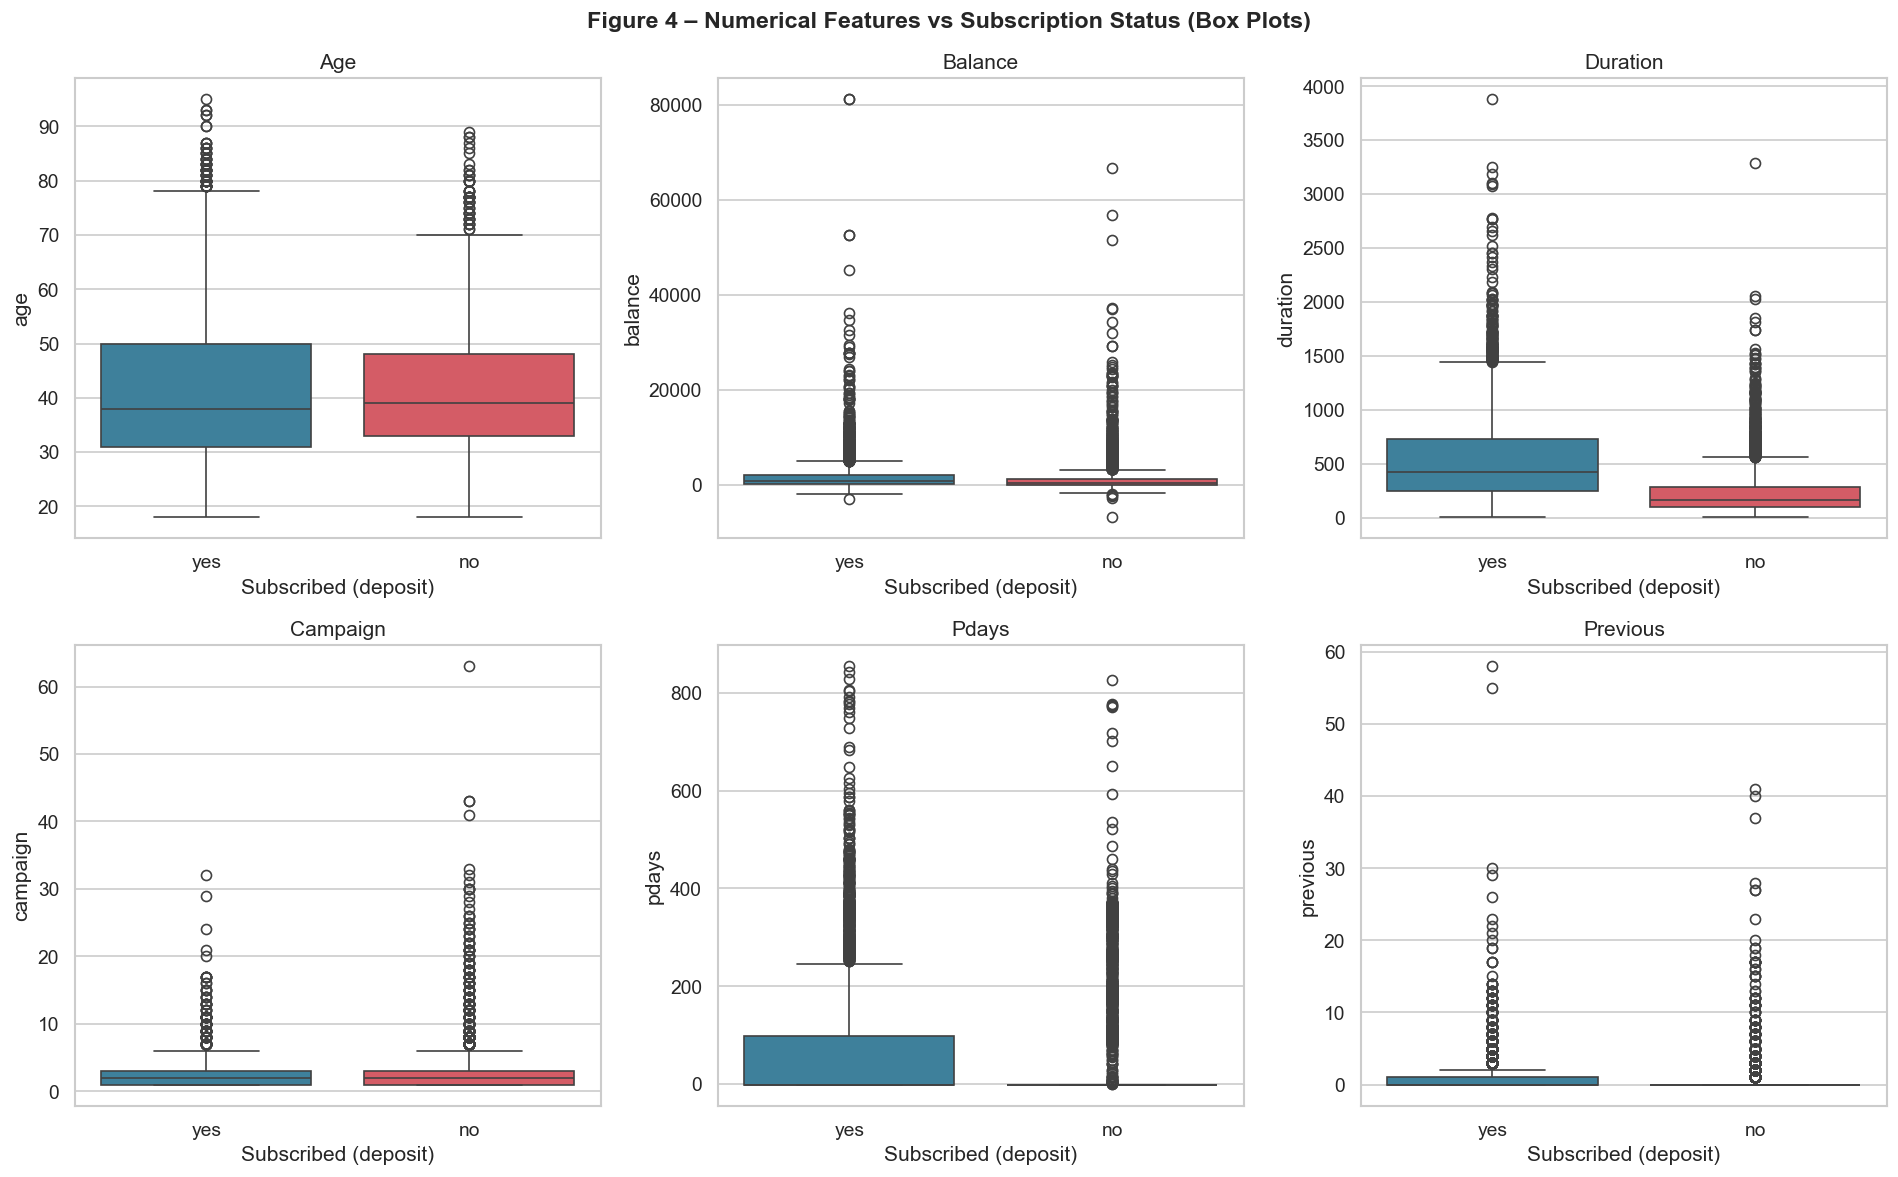

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Figure 4 – Numerical Features vs Subscription Status (Box Plots)', fontsize=14, fontweight='bold')

for ax, col in zip(axes.flatten(), num_cols):
    sns.boxplot(data=df, x='deposit', y=col, palette=PALETTE, order=['yes','no'], ax=ax)
    ax.set_title(col.capitalize())
    ax.set_xlabel('Subscribed (deposit)')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

In [15]:
print('─── Independent Samples T-Test: Subscribed vs Not Subscribed ───\n')
for col in num_cols:
    yes_group = df[df['deposit'] == 'yes'][col]
    no_group  = df[df['deposit'] == 'no'][col]
    t_stat, p_val = stats.ttest_ind(yes_group, no_group)
    sig = '✅ Significant' if p_val < 0.05 else '❌ Not Significant'
    print(f'  {col:10s}: t={t_stat:7.3f}, p={p_val:.4f}  →  {sig}')

─── Independent Samples T-Test: Subscribed vs Not Subscribed ───

  age       : t=  3.689, p=0.0002  →  ✅ Significant
  balance   : t=  8.599, p=0.0000  →  ✅ Significant
  duration  : t= 53.518, p=0.0000  →  ✅ Significant
  campaign  : t=-13.643, p=0.0000  →  ✅ Significant
  pdays     : t= 16.202, p=0.0000  →  ✅ Significant
  previous  : t= 14.922, p=0.0000  →  ✅ Significant


> **Insight:** `duration` (call duration) shows the strongest separation between subscribed and non-subscribed clients — longer calls are strongly associated with subscription. `balance` and `previous` also show statistically significant differences.

---
## 🔗 9. Bivariate Analysis – Categorical Features vs Target

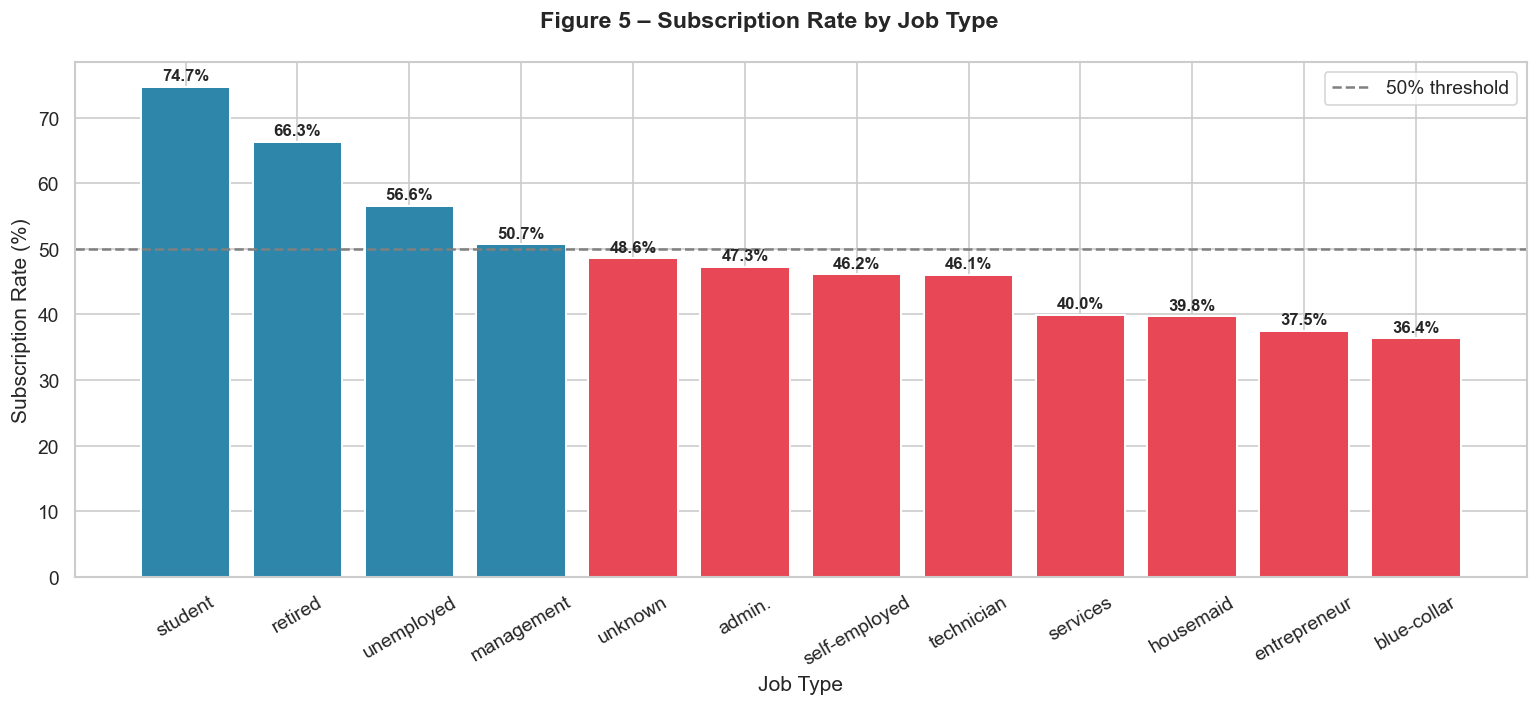

In [16]:
fig, ax = plt.subplots(figsize=(13, 6))
fig.suptitle('Figure 5 – Subscription Rate by Job Type', fontsize=14, fontweight='bold')

job_sub = df.groupby('job')['deposit'].apply(lambda x: (x=='yes').mean() * 100).sort_values(ascending=False)
colors  = [YES_COLOR if v >= 50 else NO_COLOR for v in job_sub.values]
bars = ax.bar(job_sub.index, job_sub.values, color=colors, edgecolor='white', linewidth=1.2)
for bar, val in zip(bars, job_sub.values):
    ax.text(bar.get_x() + bar.get_width()/2, val + 0.5,
            f'{val:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
ax.axhline(50, color='gray', linestyle='--', linewidth=1.5, label='50% threshold')
ax.set_ylabel('Subscription Rate (%)')
ax.set_xlabel('Job Type')
ax.tick_params(axis='x', rotation=30)
ax.legend()
plt.tight_layout()
plt.show()

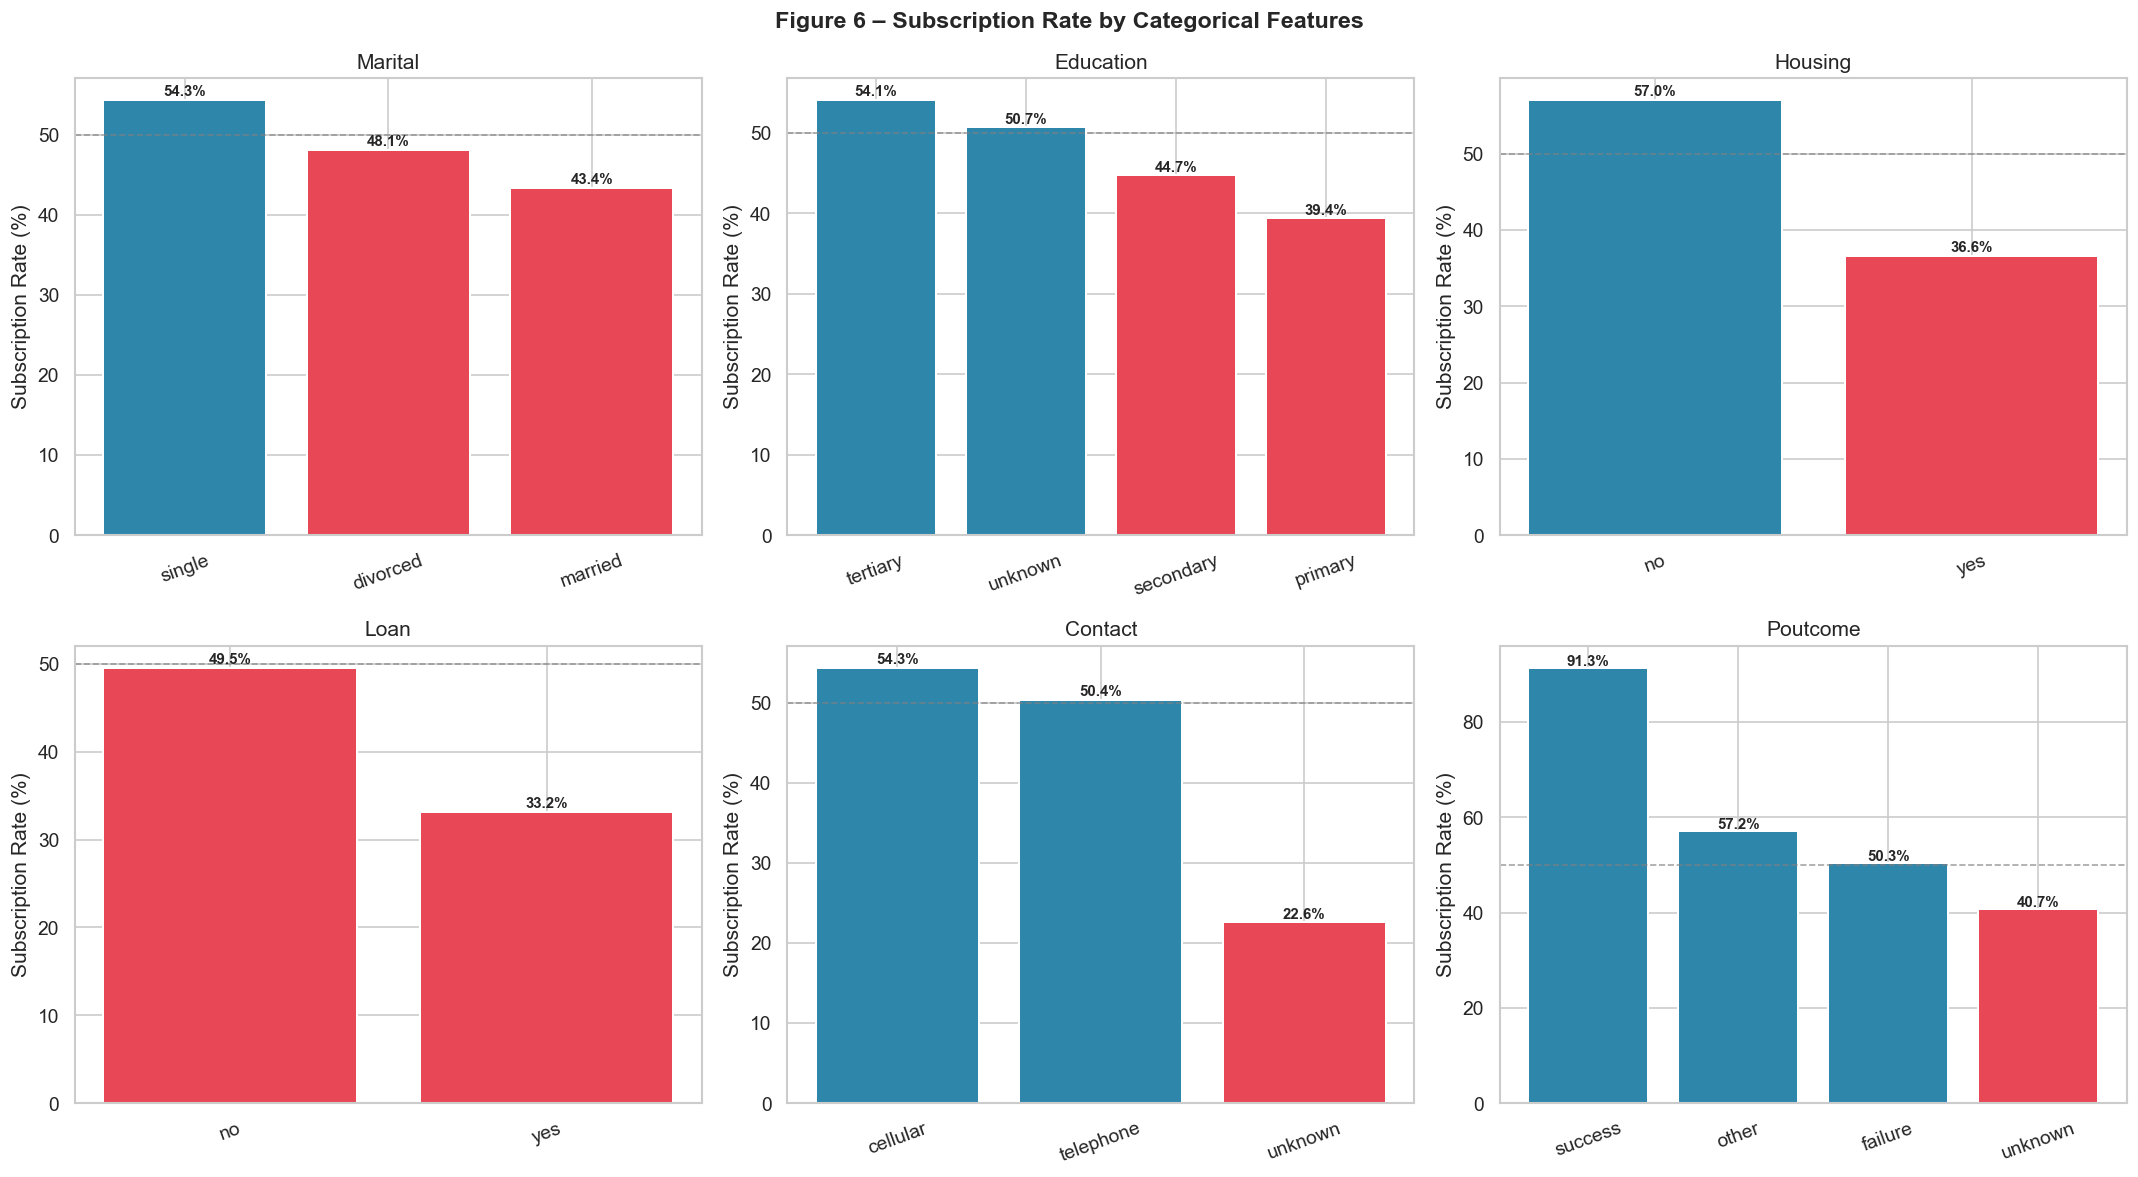

In [17]:
cat_features = ['marital', 'education', 'housing', 'loan', 'contact', 'poutcome']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Figure 6 – Subscription Rate by Categorical Features', fontsize=14, fontweight='bold')

for ax, col in zip(axes.flatten(), cat_features):
    sub_rate = df.groupby(col)['deposit'].apply(lambda x: (x=='yes').mean() * 100).sort_values(ascending=False)
    bar_colors = [YES_COLOR if v >= 50 else NO_COLOR for v in sub_rate.values]
    bars = ax.bar(sub_rate.index, sub_rate.values, color=bar_colors, edgecolor='white', linewidth=1.2)
    for bar, val in zip(bars, sub_rate.values):
        ax.text(bar.get_x() + bar.get_width()/2, val + 0.5,
                f'{val:.1f}%', ha='center', fontsize=9, fontweight='bold')
    ax.axhline(50, color='gray', linestyle='--', linewidth=1, alpha=0.7)
    ax.set_title(col.capitalize())
    ax.set_ylabel('Subscription Rate (%)')
    ax.tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

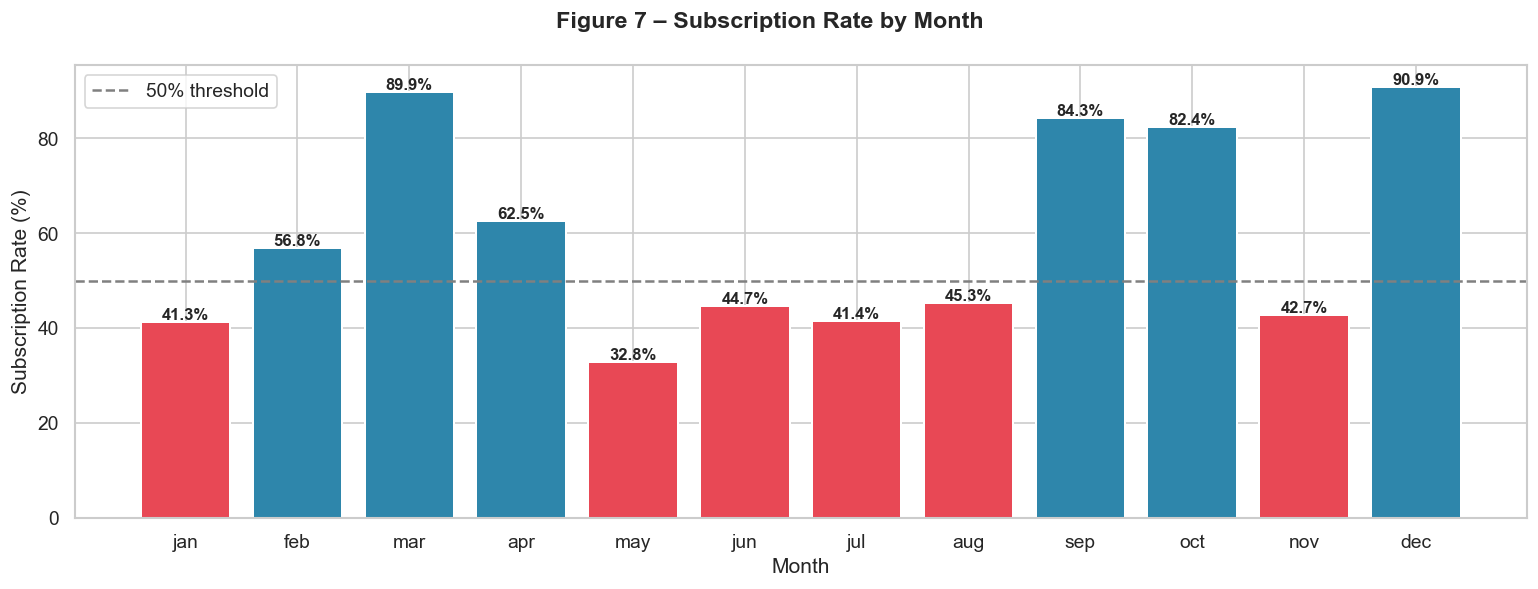

In [18]:
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
months_present = [m for m in month_order if m in df['month'].unique()]

month_sub = df.groupby('month')['deposit'].apply(lambda x: (x=='yes').mean() * 100)
month_sub = month_sub.reindex(months_present)

fig, ax = plt.subplots(figsize=(13, 5))
fig.suptitle('Figure 7 – Subscription Rate by Month', fontsize=14, fontweight='bold')

bar_colors = [YES_COLOR if v >= 50 else NO_COLOR for v in month_sub.values]
bars = ax.bar(month_sub.index, month_sub.values, color=bar_colors, edgecolor='white', linewidth=1.2)
for bar, val in zip(bars, month_sub.values):
    ax.text(bar.get_x() + bar.get_width()/2, val + 0.5,
            f'{val:.1f}%', ha='center', fontsize=10, fontweight='bold')
ax.axhline(50, color='gray', linestyle='--', linewidth=1.5, label='50% threshold')
ax.set_ylabel('Subscription Rate (%)')
ax.set_xlabel('Month')
ax.legend()
plt.tight_layout()
plt.show()

> **Insight:** Clients with a **successful previous outcome** have dramatically higher subscription rates. **Retired** and **student** job categories outperform others. Clients with **no housing loan** and **no personal loan** are more likely to subscribe. **Cellular contact** outperforms telephone and unknown. Months like **March, September, October, and December** show higher subscription rates.

---
## 🔥 10. Correlation Analysis

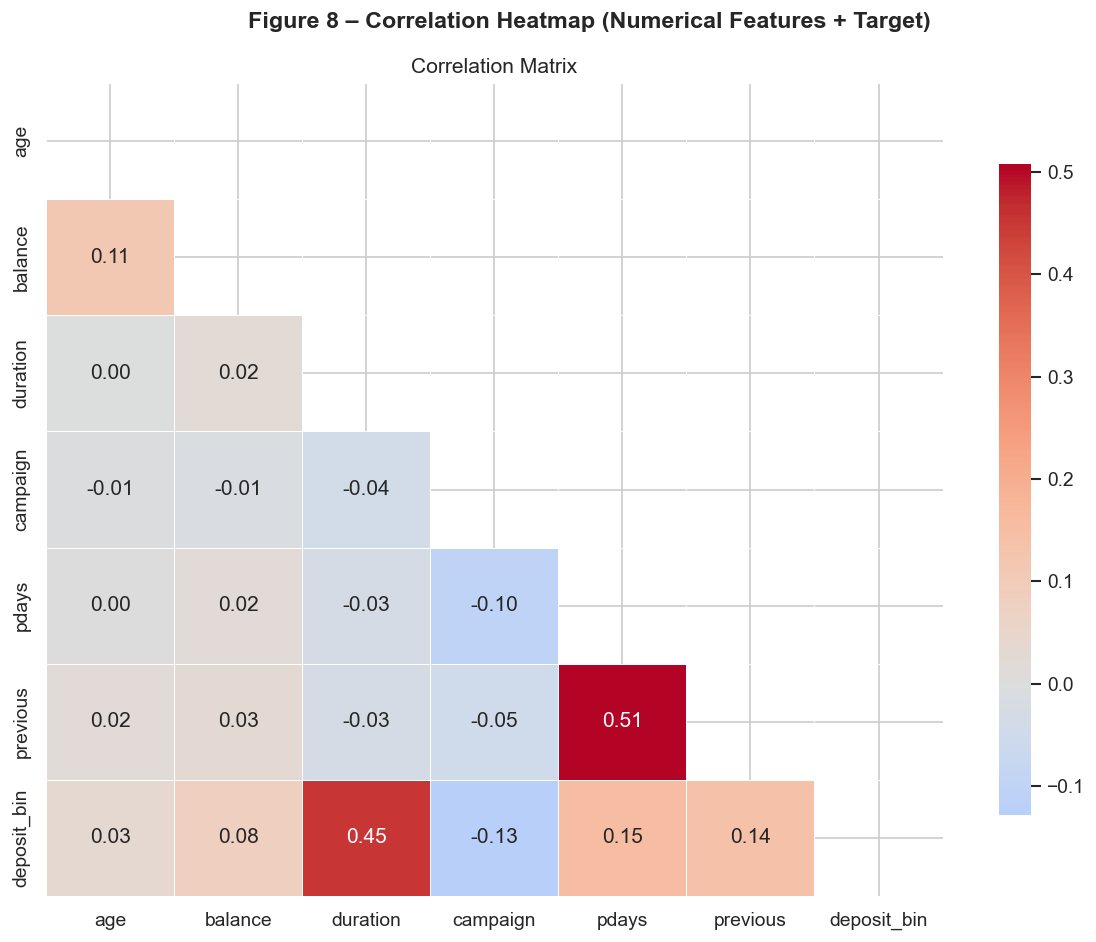


─── Correlation with Target (deposit) ───
duration    0.451919
pdays       0.151593
previous    0.139867
balance     0.081129
age         0.034901
campaign   -0.128081
Name: deposit_bin, dtype: float64


In [19]:
df_enc = df.copy()
df_enc['deposit_bin'] = (df['deposit'] == 'yes').astype(int)

corr_matrix = df_enc[num_cols + ['deposit_bin']].corr()

fig, ax = plt.subplots(figsize=(10, 8))
fig.suptitle('Figure 8 – Correlation Heatmap (Numerical Features + Target)', fontsize=14, fontweight='bold')

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, mask=mask, ax=ax,
            linewidths=0.5, cbar_kws={'shrink': 0.8})
ax.set_title('Correlation Matrix')
plt.tight_layout()
plt.show()

print('\n─── Correlation with Target (deposit) ───')
print(corr_matrix['deposit_bin'].drop('deposit_bin').sort_values(ascending=False))

> **Insight:** `duration` has the strongest positive correlation with the target variable. `previous` shows a moderate positive relationship. `campaign` has a slight negative correlation — more calls in this campaign may indicate client reluctance. Multicollinearity among predictors is low, which is favorable for logistic regression.

---
## 📦 11. Outlier Detection

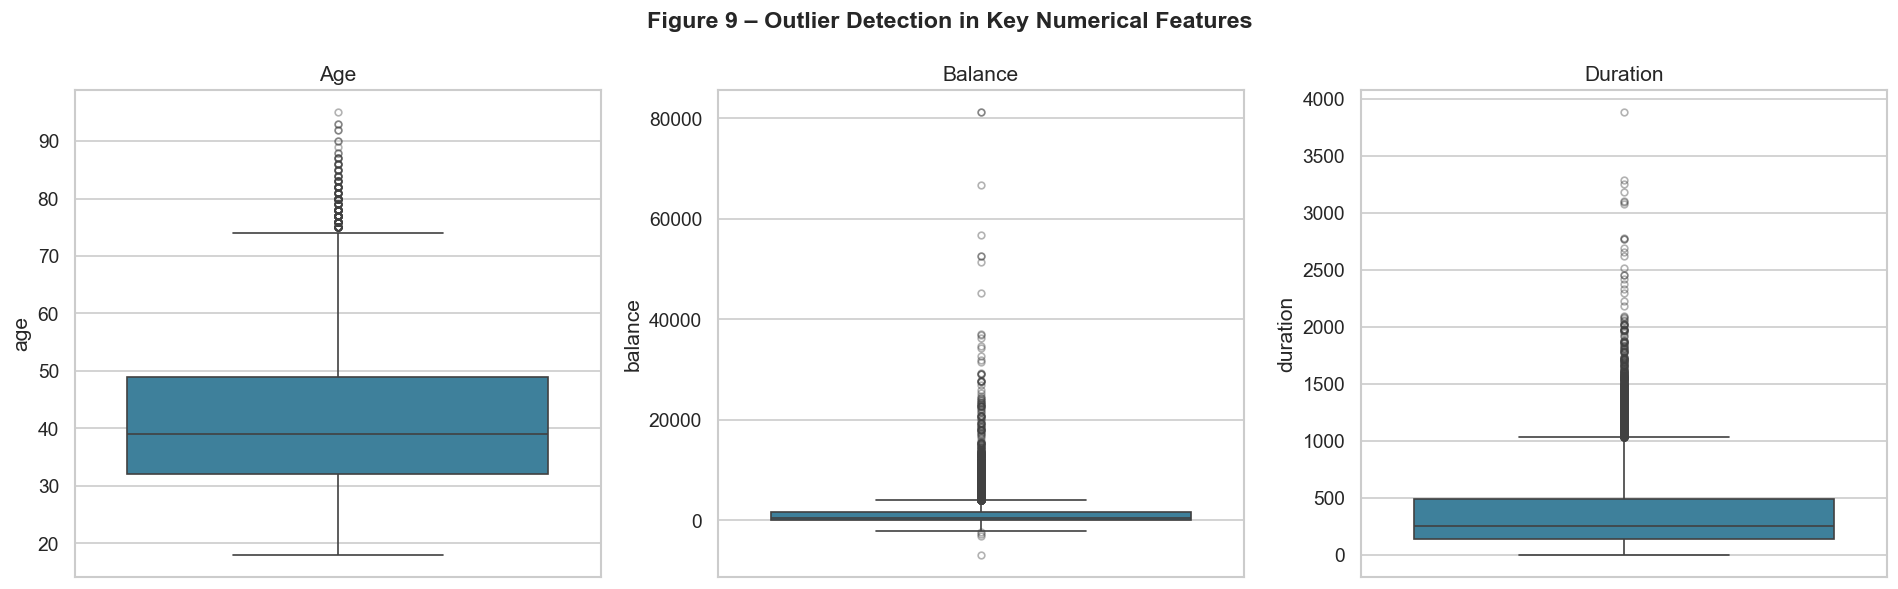

─── Outlier Count per Feature (IQR Method) ───
  age       :  171 outliers (1.5%)
  balance   : 1055 outliers (9.5%)
  duration  :  636 outliers (5.7%)
  campaign  :  601 outliers (5.4%)
  pdays     : 2750 outliers (24.6%)
  previous  : 1258 outliers (11.3%)


In [20]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Figure 9 – Outlier Detection in Key Numerical Features', fontsize=14, fontweight='bold')

outlier_cols = ['age', 'balance', 'duration']
for ax, col in zip(axes, outlier_cols):
    sns.boxplot(y=df[col], color=YES_COLOR, ax=ax, flierprops={'marker':'o','alpha':0.4,'markersize':4})
    ax.set_title(col.capitalize())
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

print('─── Outlier Count per Feature (IQR Method) ───')
for col in num_cols:
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].shape[0]
    pct = outliers / len(df) * 100
    print(f'  {col:10s}: {outliers:4d} outliers ({pct:.1f}%)')

> **Insight:** `balance` and `duration` contain significant outliers. Extreme `balance` values may represent high-value customers with different subscription behaviors. Extremely long `duration` calls likely indicate strong client interest. These outliers will be handled during preprocessing in the modeling phase (capping or log transformation).

---
## 🔄 12. Relationship Check – Scatter & Pair Plot

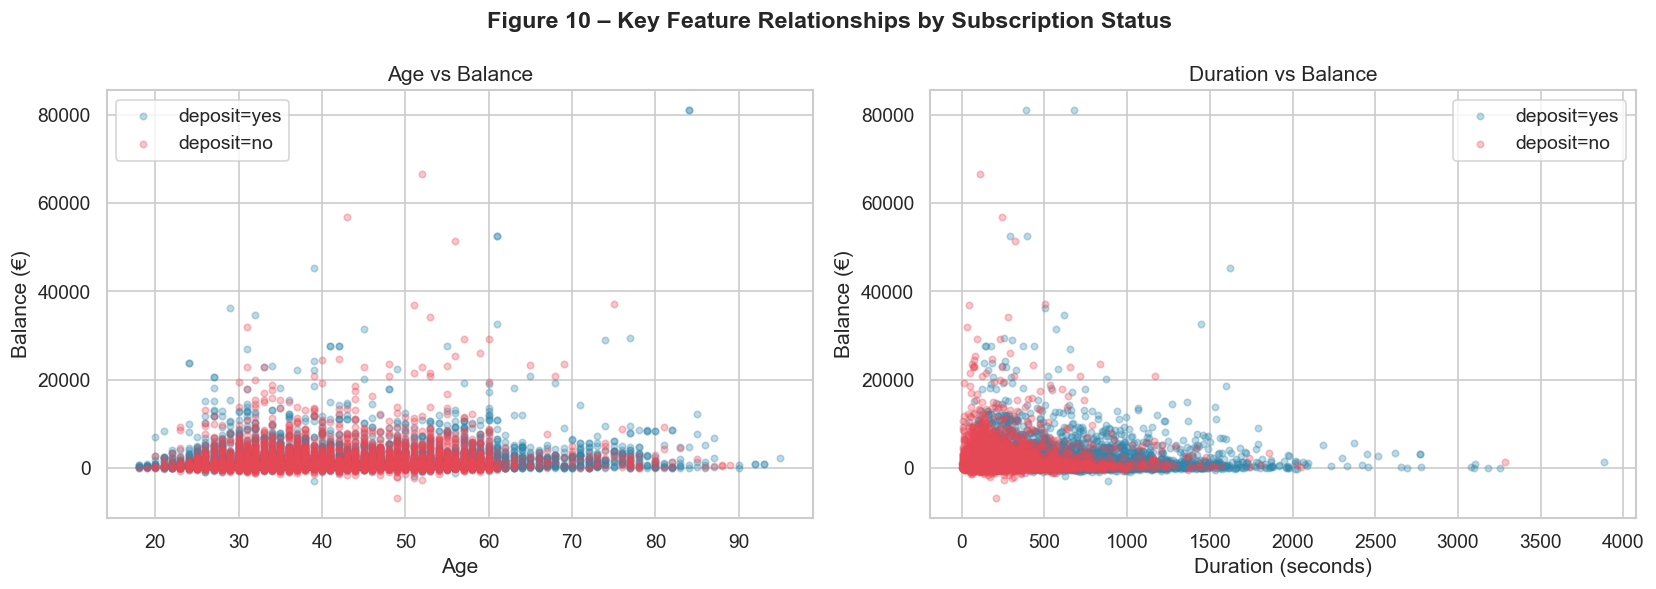

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Figure 10 – Key Feature Relationships by Subscription Status', fontsize=14, fontweight='bold')

for label, color in zip(['yes', 'no'], [YES_COLOR, NO_COLOR]):
    sub = df[df['deposit'] == label]
    axes[0].scatter(sub['age'], sub['balance'], alpha=0.3, color=color,
                    label=f'deposit={label}', s=15)
axes[0].set_title('Age vs Balance')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Balance (€)')
axes[0].legend()

for label, color in zip(['yes', 'no'], [YES_COLOR, NO_COLOR]):
    sub = df[df['deposit'] == label]
    axes[1].scatter(sub['duration'], sub['balance'], alpha=0.3, color=color,
                    label=f'deposit={label}', s=15)
axes[1].set_title('Duration vs Balance')
axes[1].set_xlabel('Duration (seconds)')
axes[1].set_ylabel('Balance (€)')
axes[1].legend()

plt.tight_layout()
plt.show()

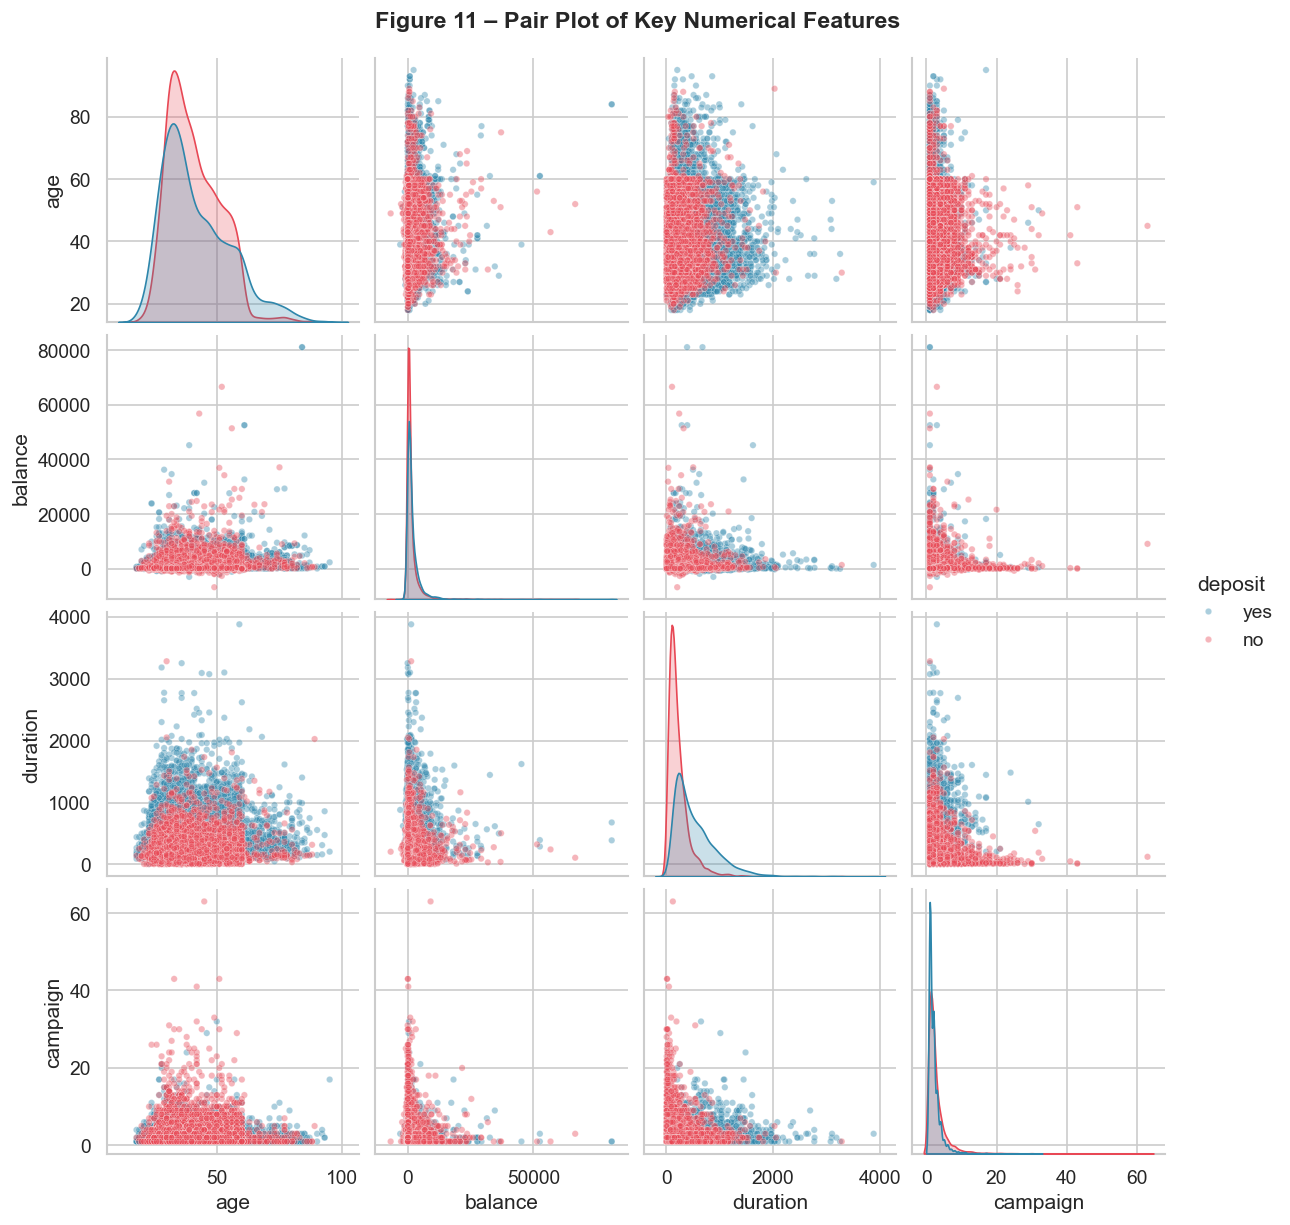

In [22]:
pair_cols = ['age', 'balance', 'duration', 'campaign', 'deposit']
pair_df = df[pair_cols].copy()

g = sns.pairplot(pair_df, hue='deposit', palette=PALETTE,
                 plot_kws={'alpha': 0.4, 's': 15},
                 diag_kind='kde')
g.fig.suptitle('Figure 11 – Pair Plot of Key Numerical Features', y=1.02, fontsize=14, fontweight='bold')
plt.show()

---
## ✅ 13. EDA Summary & Key Insights

In [23]:
print("""
╔══════════════════════════════════════════════════════════════════╗
║         WEEK 3 EDA – KEY INSIGHTS SUMMARY (Team Fintech)        ║
╠══════════════════════════════════════════════════════════════════╣
║                                                                  ║
║  DATASET                                                         ║
║  • 11,162 records | 17 columns | No missing values or duplicates ║
║  • Target (deposit): ~47.4% Yes | ~52.6% No → Near balanced     ║
║                                                                  ║
║  TOP PREDICTORS IDENTIFIED                                       ║
║  1. duration     – Strongest predictor; longer calls = more subs ║
║  2. poutcome     – Previous success drastically boosts sub rate  ║
║  3. balance      – Higher balance clients subscribe more         ║
║  4. contact      – Cellular contact outperforms telephone        ║
║  5. job          – Retired & students show highest rates         ║
║  6. month        – Mar, Sep, Oct, Dec show peak subscription     ║
║  7. housing/loan – No loan clients are more likely to subscribe  ║
║                                                                  ║
║  DATA QUALITY                                                    ║
║  • No missing values detected                                    ║
║  • No duplicate rows found                                       ║
║  • Outliers present in: balance, duration (to be handled)        ║
║  • pdays = -1 for most clients (no prior contact)                ║
║                                                                  ║
║  NEXT STEPS (Week 4)                                             ║
║  • Feature encoding (Label/One-Hot)                              ║
║  • Outlier treatment (capping / log transform)                   ║
║  • Feature selection for Logistic Regression                     ║
║  • Hypothesis development                                        ║
╚══════════════════════════════════════════════════════════════════╝
""")


╔══════════════════════════════════════════════════════════════════╗
║         WEEK 3 EDA – KEY INSIGHTS SUMMARY (Team Fintech)        ║
╠══════════════════════════════════════════════════════════════════╣
║                                                                  ║
║  DATASET                                                         ║
║  • 11,162 records | 17 columns | No missing values or duplicates ║
║  • Target (deposit): ~47.4% Yes | ~52.6% No → Near balanced     ║
║                                                                  ║
║  TOP PREDICTORS IDENTIFIED                                       ║
║  1. duration     – Strongest predictor; longer calls = more subs ║
║  2. poutcome     – Previous success drastically boosts sub rate  ║
║  3. balance      – Higher balance clients subscribe more         ║
║  4. contact      – Cellular contact outperforms telephone        ║
║  5. job          – Retired & students show highest rates         ║
║  6. month        – Mar, Sep, Oct,